In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_column',None)

In [3]:
df=pd.read_csv(r'..\data\final_cleaned.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,Deck,HasCabin,FamilySize,IsAlone,FarePerPerson,AgeBin,FareQuantile,FareBin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Unknown,0,2,0,3.62500,Young Adults,Low,Low
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,C,1,2,0,35.64165,Middle Adults,Very High,Upper Middle
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,Unknown,0,1,1,7.92500,Young Adults,Mid,Low
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs,C,1,2,0,26.55000,Middle Adults,Very High,Middle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr,Unknown,0,1,1,8.05000,Middle Adults,Mid,Low


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    int64  
 2   Pclass         891 non-null    int64  
 3   Name           891 non-null    object 
 4   Sex            891 non-null    object 
 5   Age            857 non-null    float64
 6   SibSp          891 non-null    int64  
 7   Parch          891 non-null    int64  
 8   Ticket         891 non-null    object 
 9   Fare           891 non-null    float64
 10  Cabin          215 non-null    object 
 11  Embarked       889 non-null    object 
 12  LastName       891 non-null    object 
 13  Title          891 non-null    object 
 14  Deck           891 non-null    object 
 15  HasCabin       891 non-null    int64  
 16  FamilySize     891 non-null    int64  
 17  IsAlone        891 non-null    int64  
 18  FarePerPer

## Missing Values

In [6]:
df.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age               34
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            676
Embarked           2
LastName           0
Title              0
Deck               0
HasCabin           0
FamilySize         0
IsAlone            0
FarePerPerson      0
AgeBin            34
FareQuantile       0
FareBin            0
dtype: int64

In [7]:
feature_na=[feature for feature in df.columns if df[feature].isnull().sum()>1]
for feature in feature_na:
    print(f'{feature}: {np.round(df[feature].isnull().mean()*100,4)}% missing values')

Age: 3.8159% missing values
Cabin: 75.8698% missing values
Embarked: 0.2245% missing values
AgeBin: 3.8159% missing values


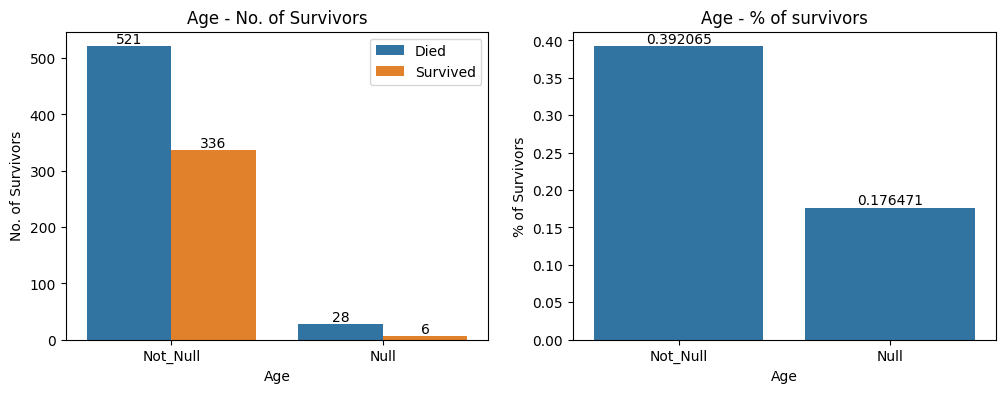

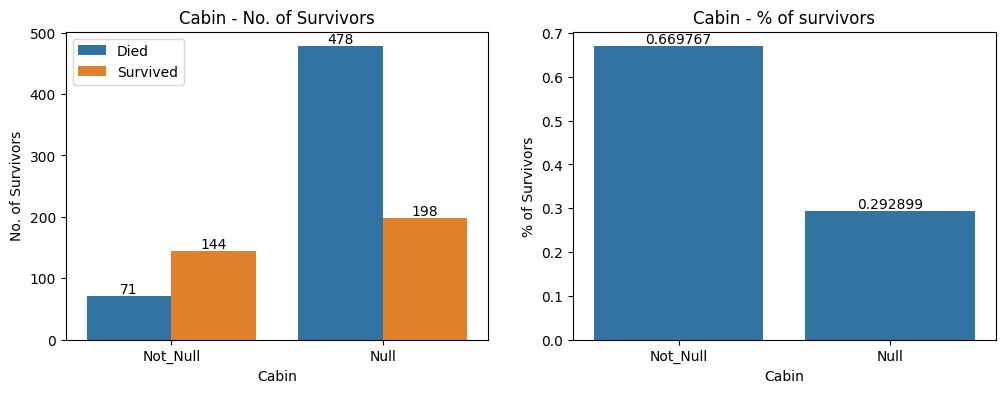

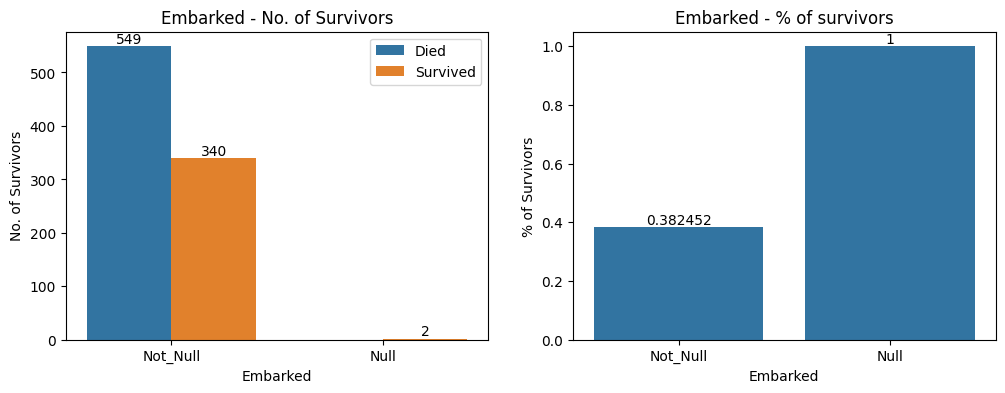

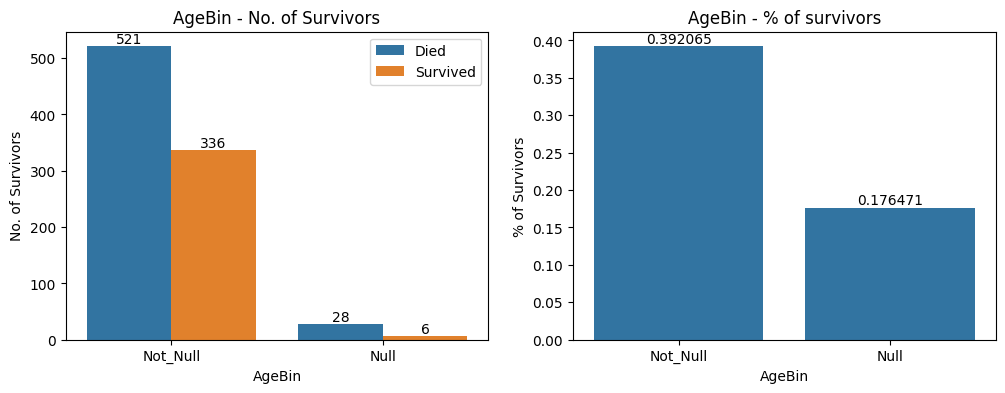

In [8]:
for feature in feature_na:
    data_na=df.copy()
    data_na[feature]=np.where(data_na[feature].isnull(),'Null','Not_Null')
    fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(12,4))
    sns.countplot(data_na,x=feature,hue='Survived',ax=axes[0],order=['Not_Null','Null'])
    axes[0].set_title(f'{feature} - No. of Survivors')
    axes[0].set_ylabel('No. of Survivors')
    
    sns.barplot(data_na,x=feature,y='Survived',ax=axes[1],errorbar=None,order=['Not_Null','Null'])
    axes[1].set_title(f'{feature} - % of survivors')
    axes[1].set_ylabel(f'% of Survivors')
    
    for ax in axes:
        ax.set_xlabel(feature)
        for container in ax.containers:
            ax.bar_label(container,label_type='edge')
    axes[0].legend(['Died','Survived'])
        
    plt.show()

<Axes: xlabel='Embarked', ylabel='count'>

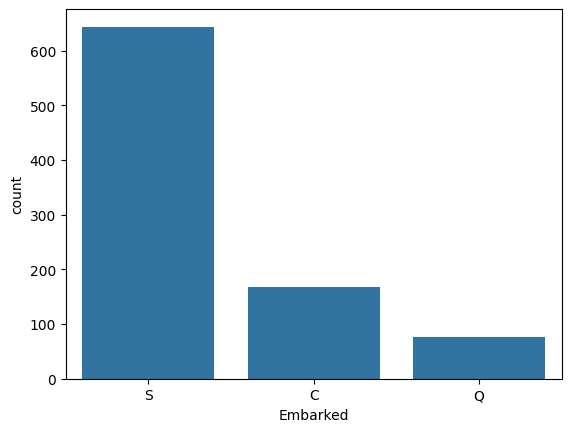

In [9]:
sns.countplot(df,x='Embarked')

In [10]:
df.loc[df['Embarked'].isnull(),'Embarked']=df['Embarked'].mode()

## 3. Handling Missing Data (Feature NA Summary)

### 3.1 Age & AgeBin
- **Missing Values:** `34` missing values (`3.815%` of total).
- **Survival among Missing `Age`:** `6` survived (`17.64%` of those with missing age).
- **Observation:** *The survival rate for passengers with missing age data was significantly lower than the overall average, suggesting these might represent a distinct group or that the missingness itself is correlated with lower survival outcomes before imputation.*

### 3.2 Cabin & Derived Features (Deck, HasCabin)
- **Missing Values (`Cabin`):** `676` missing values (`75.8698%` of total). This is the basis for `HasCabin` and influences `Deck`.
- **Survival among Missing `Cabin`:** `144` survived (`66.97%` of those with missing raw cabin data, i.e., `HasCabin` = False).
- **Handling Strategy:**
    - `HasCabin`: Created as a binary feature (1 if Cabin data exists, 0 otherwise).
    - `Deck`: Extracted from `Cabin` string. Missing `Cabin` leads to 'Unknown' Deck.
- **Observation:** *A vast majority of passengers (75.8%) had missing cabin information. Interestingly, passengers for whom cabin information *was* available (`HasCabin`=True) had a significantly higher survival rate (66.9%) compared to those without (29.3%). This suggests cabin information, or what it implies (likely higher class/fare), is a strong indicator of survival.*

### 3.3 Embarked
- **Missing Values:** `2` missing values (`0.2245%` of total).
- **Survival among Missing `Embarked`:** `2` survived (`100%` of those with missing embarked data).
- **Imputation Strategy:** Imputed with the mode of the embarkation data -'S'.
- **Observation:** *Only two passengers had missing embarkation data, and both survived. Imputation with the mode is unlikely to significantly impact overall analysis due to the small number.*

## Variables

In [11]:
df.nunique()

PassengerId      891
Survived           2
Pclass             3
Name             891
Sex                2
Age               88
SibSp              7
Parch              7
Ticket           681
Fare             248
Cabin            147
Embarked           3
LastName         667
Title             17
Deck               9
HasCabin           2
FamilySize         9
IsAlone            2
FarePerPerson    289
AgeBin             5
FareQuantile       4
FareBin            6
dtype: int64

In [12]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,Deck,HasCabin,FamilySize,IsAlone,FarePerPerson,AgeBin,FareQuantile,FareBin
count,891.000000,891.000000,891.000000,891,891,857.000000,891.000000,891.000000,891,891.000000,215,889,891,891,891,891.000000,891.000000,891.000000,891.000000,857,891,891
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3,667,17,9,NaN,NaN,NaN,NaN,5,4,6
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S,Andersson,Mr,Unknown,NaN,NaN,NaN,NaN,Young Adults,Mid,Lower Middle
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644,9,517,676,NaN,NaN,NaN,NaN,366,224,321
mean,446.000000,0.383838,2.308642,NaN,NaN,29.497281,0.523008,0.381594,NaN,32.204208,NaN,NaN,NaN,NaN,NaN,0.241302,1.904602,0.602694,19.916375,NaN,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,13.811933,1.102743,0.806057,NaN,49.693429,NaN,NaN,NaN,NaN,NaN,0.428113,1.613459,0.489615,35.841257,NaN,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.910400,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,7.250000,NaN,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,1.000000,8.300000,NaN,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,37.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN,NaN,NaN,NaN,0.000000,2.000000,1.000000,23.666667,NaN,NaN,NaN


## Univariate and BiVariate Analysis

### Target Variable: Survived
- **Distribution:** `549` ( `61.6%` ) did not survive, `342` ( `38.38%` ) survived.
- **Observation:** *The dataset is imbalanced, with a higher proportion of non-survivors (approx. 61.6%) than survivors (approx. 38.4%).*


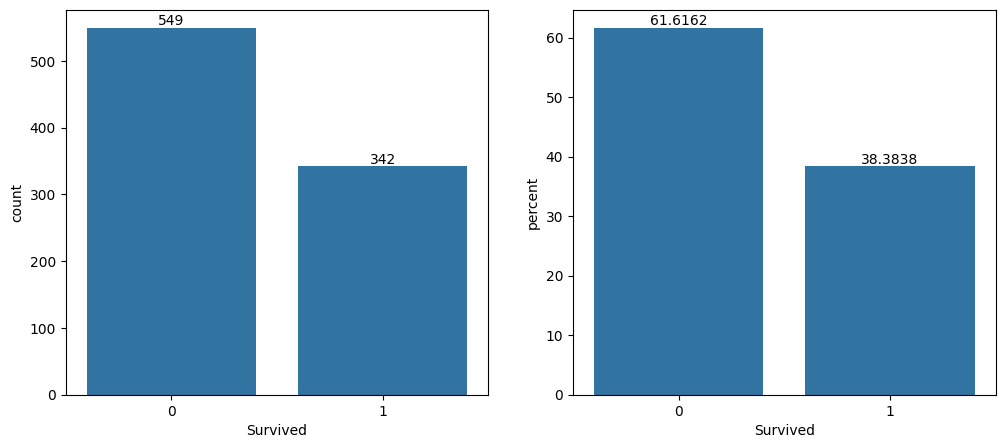

In [13]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(12,5))
sns.countplot(df,x='Survived',ax=axes[0])
sns.countplot(df,x='Survived',stat='percent',ax=axes[1])
for ax in axes:
    for container in ax.containers:
        ax.bar_label(container, label_type='edge')

In [14]:
numerical_feature=[feature for feature in df.columns if df[feature].dtypes!='O']
numerical_feature

['PassengerId',
 'Survived',
 'Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'HasCabin',
 'FamilySize',
 'IsAlone',
 'FarePerPerson']

## Discrete Features

In [15]:
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique()) in range(4,20)]
discrete_feature

['SibSp', 'Parch', 'FamilySize']

### Discrete Features

#### SibSp (Number of Siblings/Spouses Aboard)
- **Distribution:** *Majority of passengers (`608`, `68.25%`) had 0 SibSp. Smaller groups had 1, 2, etc.*
- **Survival Trend:** *Passengers with 1 sibling/spouse had the highest survival rate (`53.59%`(`112`)). Survival rate decreased for those with 0 SibSp (`34.54%`(`210`)) and for those with >2 SibSp.*
- **Observation:** *Traveling completely alone or with a very large number of siblings/spouses appears detrimental to survival compared to traveling with one or two.*

#### Parch (Number of Parents/Children Aboard)
- **Distribution:** *Most passengers (`678`, `76%`) had 0 Parch. Followed By (118,13.24%) had 1 Parch, then (80,8.98%)has 2 Parch and smaller groups had 3,4,5,6*
- **Survival Trend:** *Passengers with 1-3 Parch showed higher survival rates, with 3 Parch having `60%` survival. Those with 0 (`34.37%`) and 5 (`20%`) Parch had lower survival.*
- **Observation:** *Similar to SibSp, having some parental/child connections (1-3) seemed beneficial for survival.*


#### FamilySize (SibSp + Parch + 1)
- **Distribution:** *Singles (FamilySize=1) were the largest group (`537`,`60.27%`). Family sizes of 2-3 were common, larger families were rarer.*
- **Survival Trend:** *Passengers with FamilySize 2-4 had the highest survival rates (e.g.,`72.41%`,`59`). Singles (FamilySize=1) had a lower survival rate (`30%`), and very large families (FamilySize > 4) also saw a decline.*
- **Observation:** *Small to medium-sized families (2-4 members) had a survival advantage over those traveling alone or in very large family groups. This suggests a 'sweet spot' for family size.*


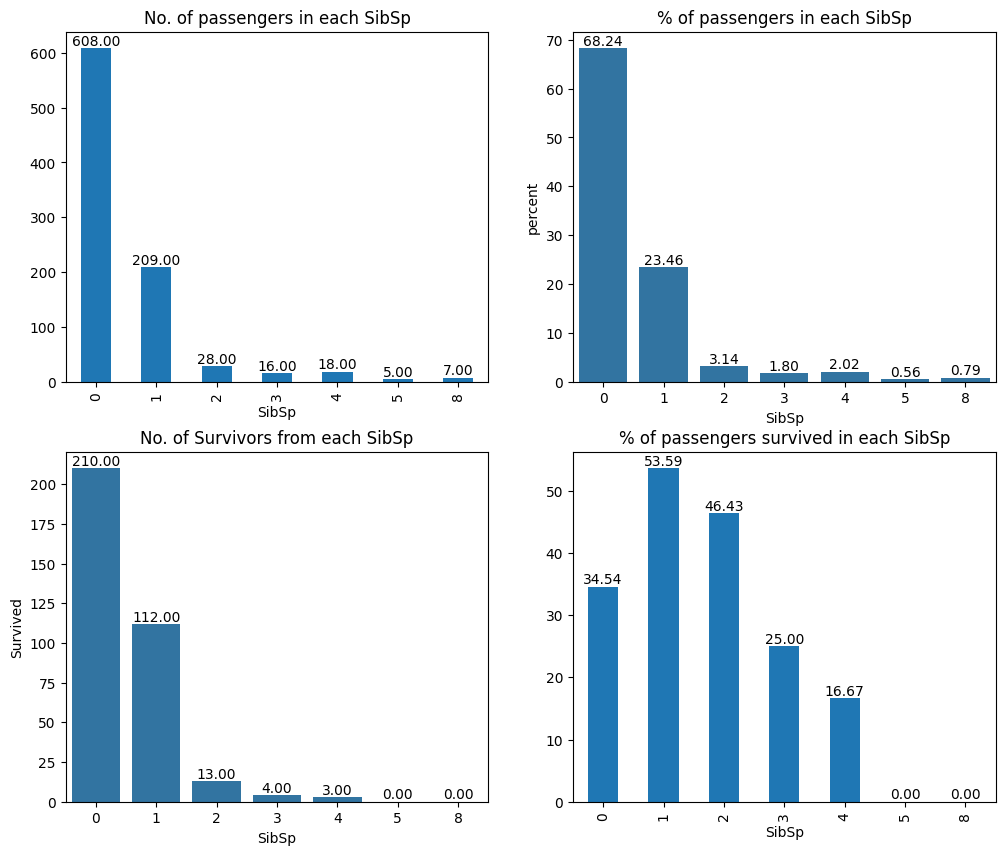

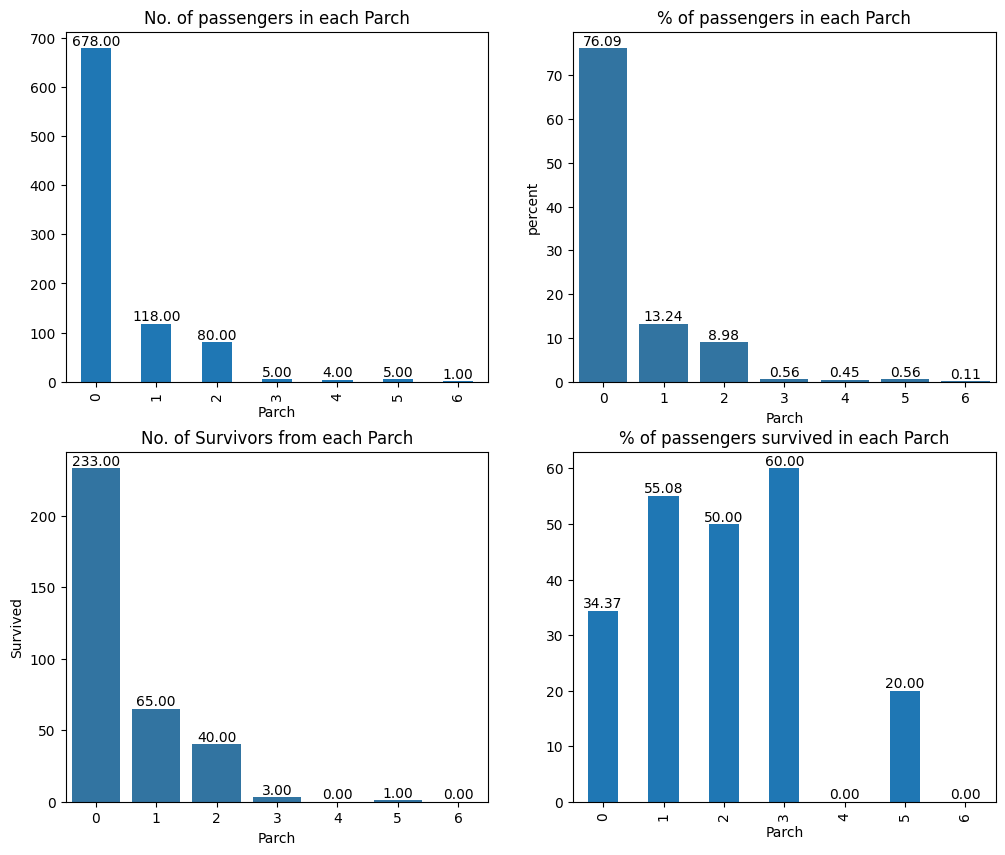

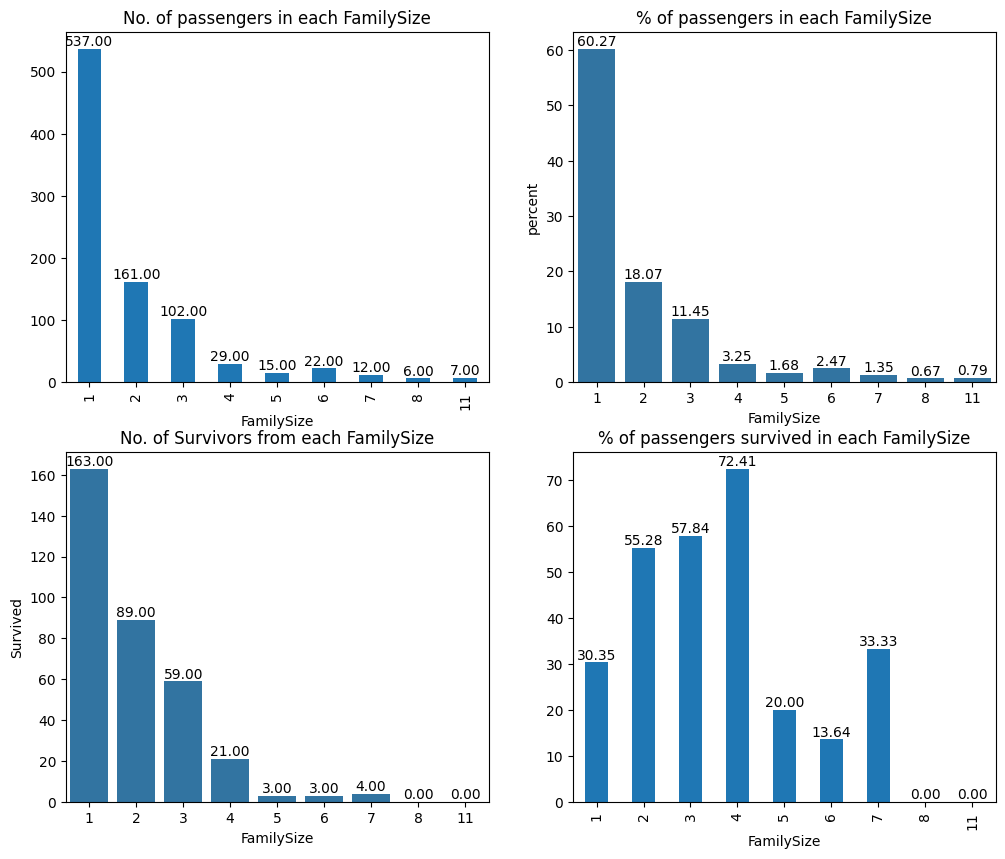

In [16]:
for feature in discrete_feature:
    data=df.copy()
    fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(12,10))
    data.groupby(feature)[feature].count().plot.bar(ax=axes[0,0])
    sns.countplot(data,x=feature,stat='percent',ax=axes[0,1])
    sns.barplot(data,x=feature,y='Survived',estimator='sum',errorbar=None,ax=axes[1,0])
    (data.groupby(feature)['Survived'].mean()*100).plot.bar(ax=axes[1,1])
    axes[0,0].set_title(f'No. of passengers in each {feature}')
    axes[0,1].set_title(f'% of passengers in each {feature}')
    axes[1,0].set_title(f'No. of Survivors from each {feature}')
    axes[1,1].set_title(f'% of passengers survived in each {feature}')
    for ax in axes.flat:
        for container in ax.containers:
            ax.bar_label(container, label_type='edge',fmt='%.2f')
    plt.show()

## Continous Features

In [17]:
continuous_feature=[feature for feature in numerical_feature if feature not in discrete_feature+['PassengerId'] and len(df[feature].unique())>20]
continuous_feature

['Age', 'Fare', 'FarePerPerson']

### Continuous Features
#### Age
- **Distribution:** *Age distribution is somewhat right-skewed, with a peak around 20-30 years. Significant number of Children and Young Adults Present. (As mean and median of this distribution is `29.5` and `28` respectively)*
- **Survival Trend (from Violin Plot/Binned Analysis):** * Violin plots show a higher density of non-survivors in the 20-30 age range. Children (via`AgeBin`) had a notably higher survival rate (`52%`). Survival generally decreases for older age groups.*
- **Observation:** *Younger passengers, particularly children, had a better chance of survival. The young adult group (approx. 20-30) seems to have a high concentration of fatalities despite also having survivors.* 
#### Fare & Fare Per Person
- **Distribution:** *Fare is heavily right-skewed, with most passengers paying lower fares. A few paid very high fares.*
- **Survival Trend:** *Violin plots clearly show that survivors had a distribution of fares extending to much higher values compared to non-survivors, whose fare were concentrated at the lower end. `FareBin` analysis confirmed a strong positive correlation: survival rates increased from `5.88%` for 'Very Low' fare to `77%` for 'High' fare.*
- **Observation:** *Fare quantiles clearly demonstrate that higher fare expenditure is strongly associated with increased survival probability.*


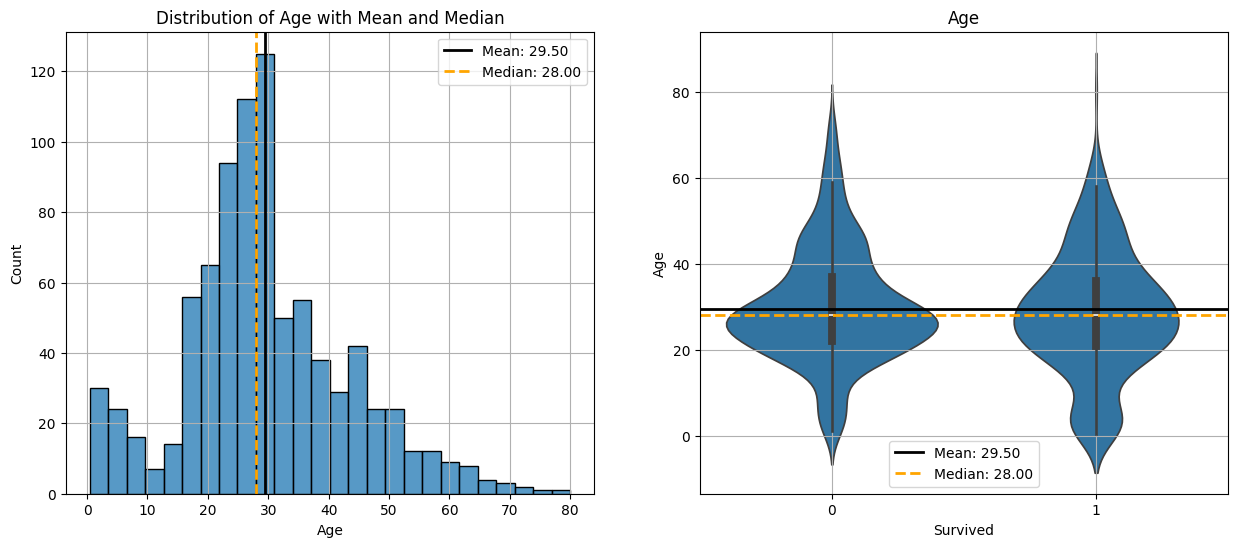

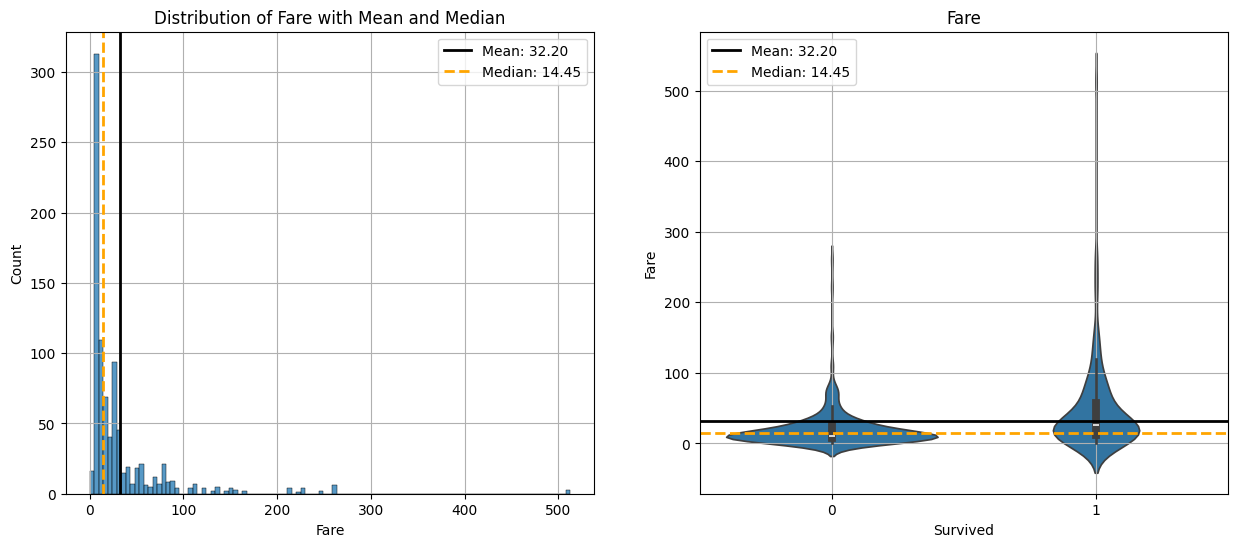

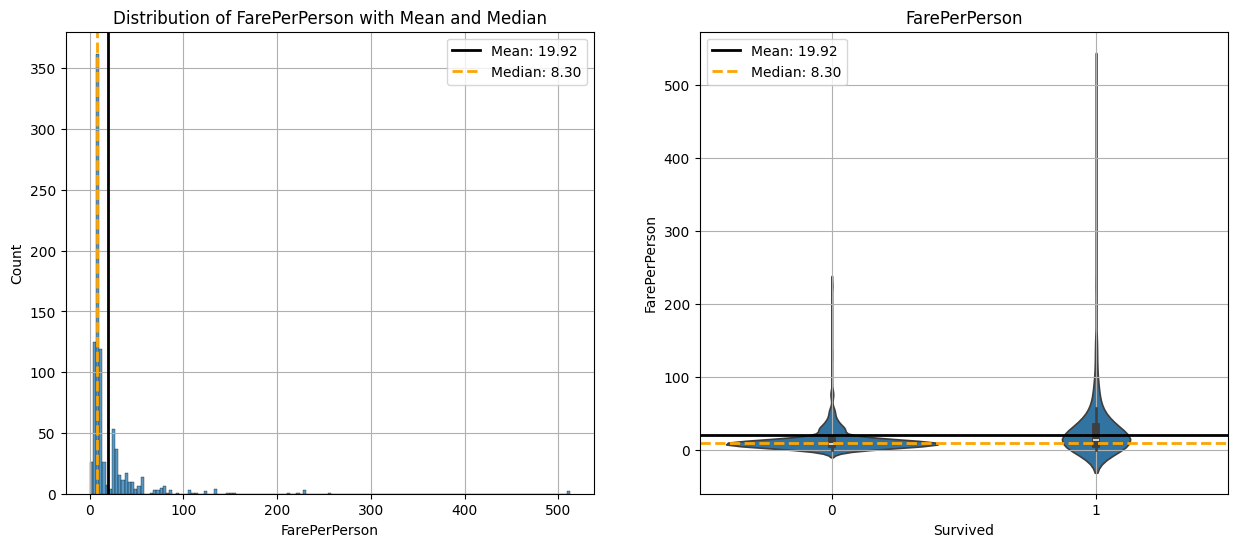

In [18]:
for feature in continuous_feature:
    data=df.copy()
    fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(15,6))
    sns.histplot(data,x=feature,ax=axes[0])
    axes[0].set_xlabel(feature)
    axes[0].axvline(data[feature].mean(), color='k', linestyle='-', lw=2, label=f'Mean: {data[feature].mean():.2f}')
    axes[0].axvline(data[feature].median(), color='orange', linestyle='--', lw=2, label=f'Median: {data[feature].median():.2f}')
    axes[0].set_title(f'Distribution of {feature} with Mean and Median')
    sns.violinplot(data,x='Survived',y=feature,ax=axes[1])
    axes[1].set_title(feature)
    axes[1].axhline(data[feature].mean(), color='k', linestyle='-', lw=2, label=f'Mean: {data[feature].mean():.2f}')
    axes[1].axhline(data[feature].median(), color='orange', linestyle='--', lw=2, label=f'Median: {data[feature].median():.2f}')
    # Display the legend
    
    # You can also specify location: plt.legend(loc='upper right')
    for ax in axes:
        ax.grid()
        ax.legend()
    plt.show()

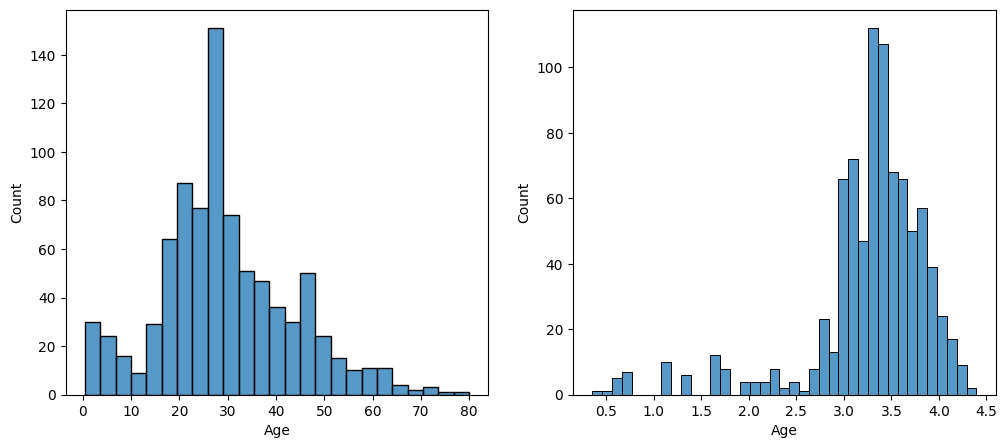

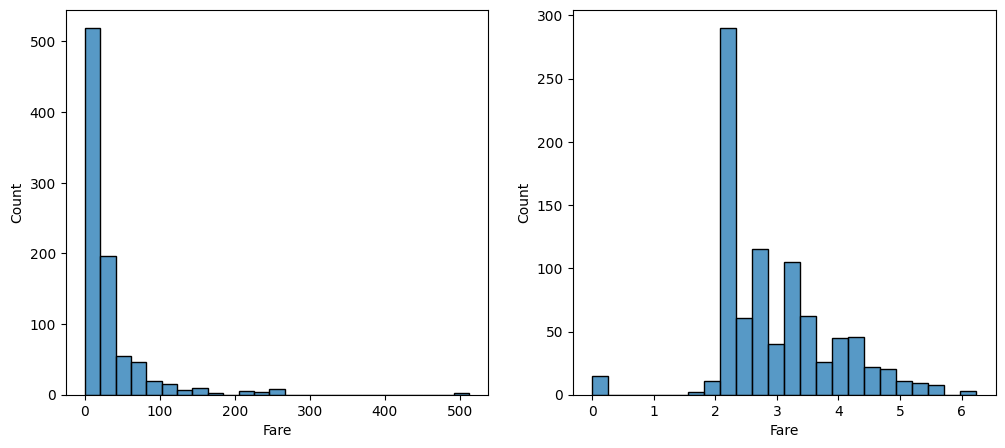

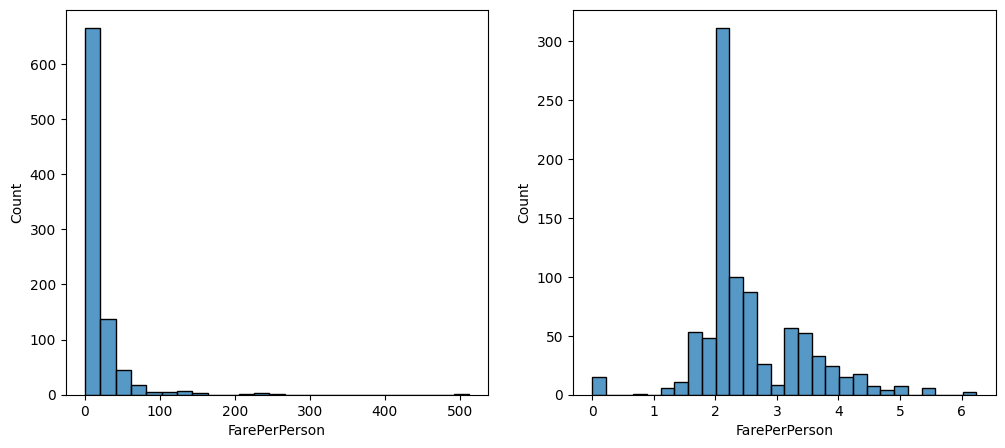

In [19]:
for feature in continuous_feature:
    data=df.copy()
    fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(12,5))
    sns.histplot(data,x=feature,ax=axes[0],bins=25)
    sns.histplot(data,x=np.log1p(data[feature]),ax=axes[1] )

## Categorical features

In [20]:
categorical_feature=[feature for feature in df.columns
                      if feature not in discrete_feature
                      and len(df[feature].unique())<20]
categorical_feature

['Survived',
 'Pclass',
 'Sex',
 'Embarked',
 'Title',
 'Deck',
 'HasCabin',
 'IsAlone',
 'AgeBin',
 'FareQuantile',
 'FareBin']

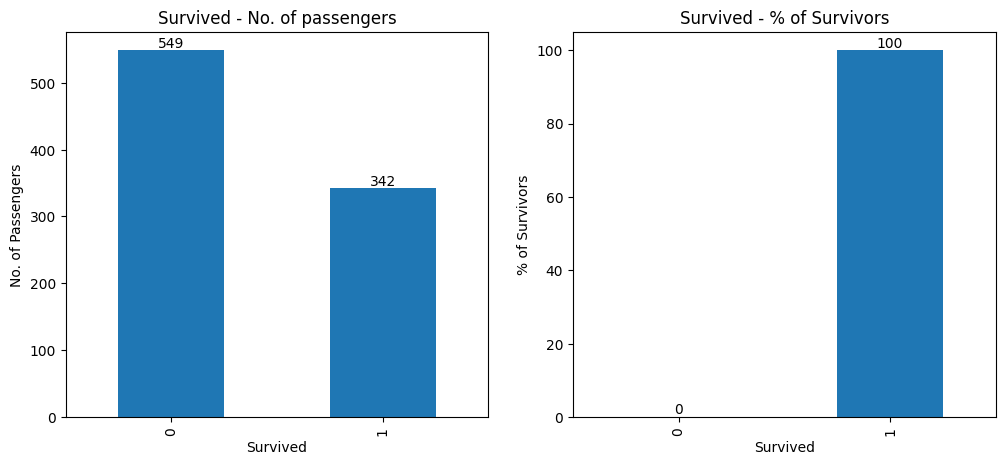

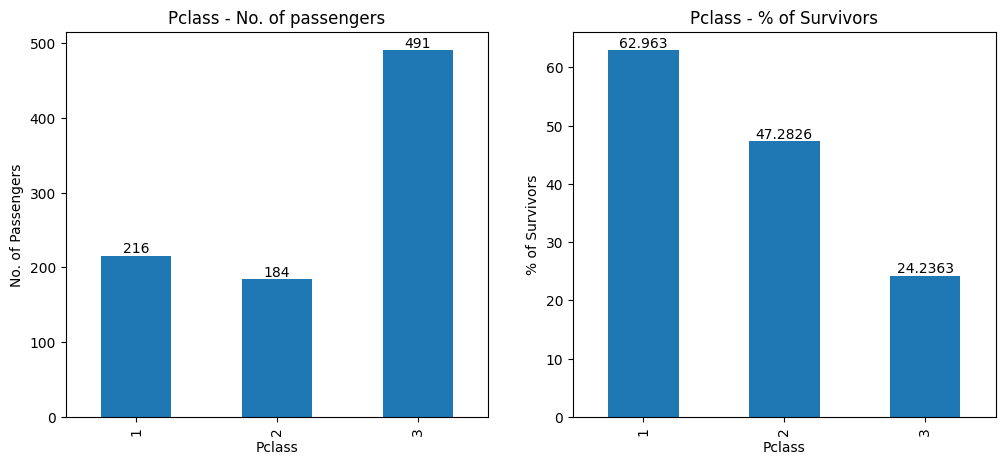

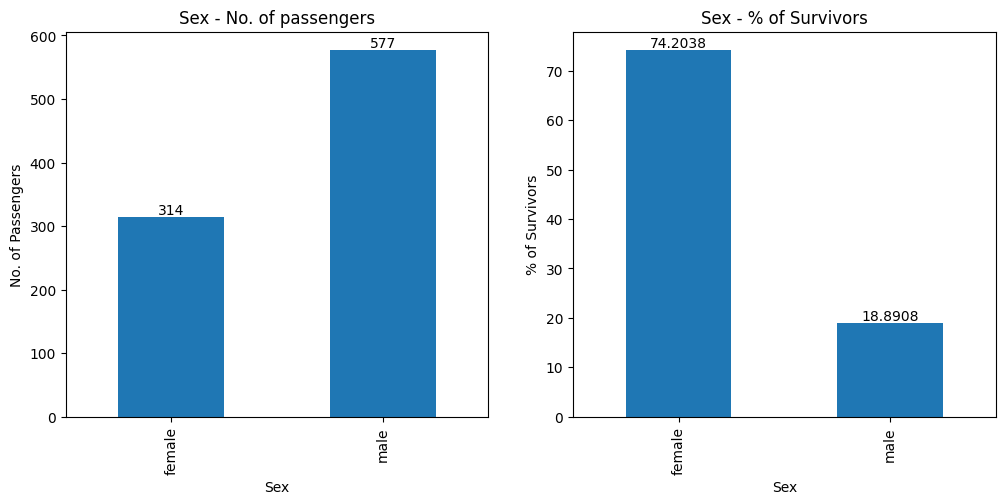

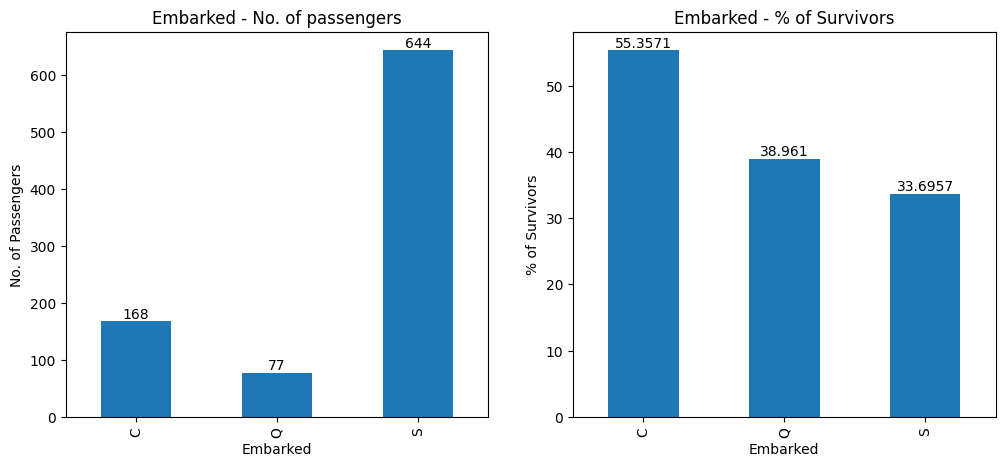

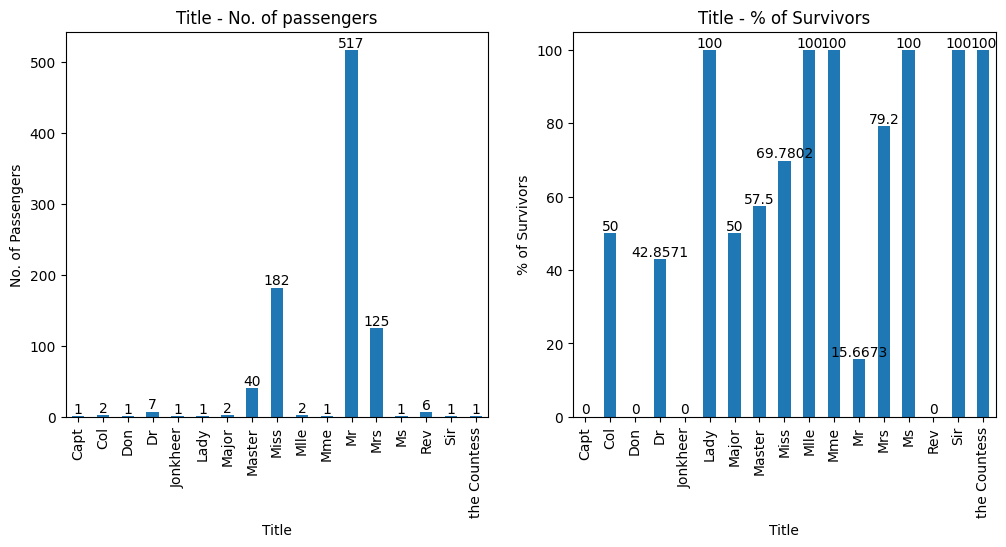

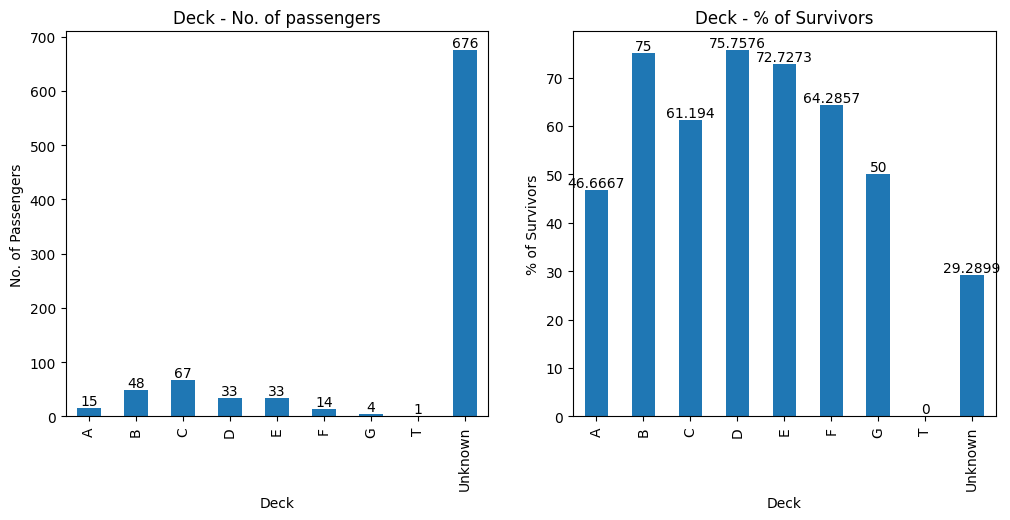

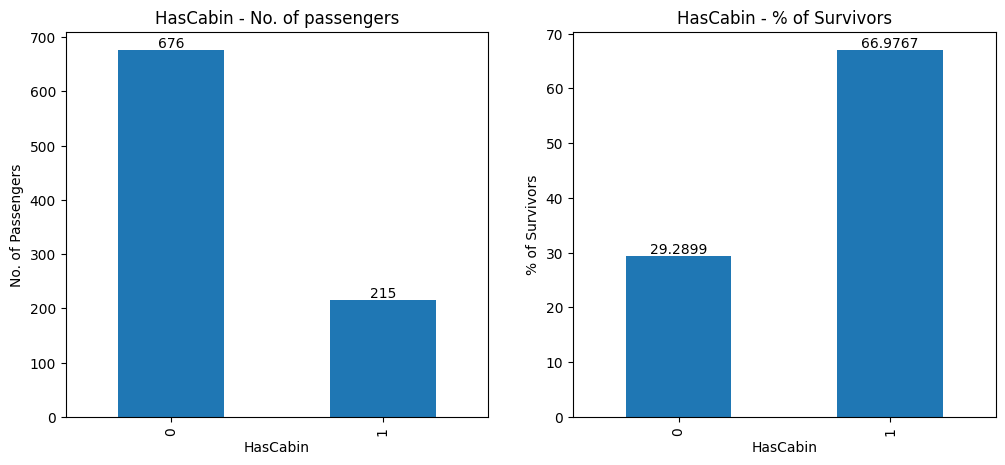

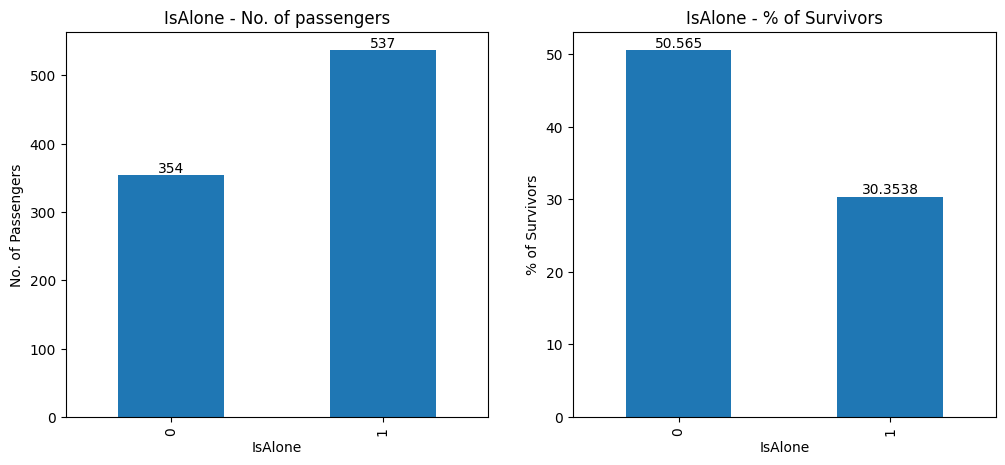

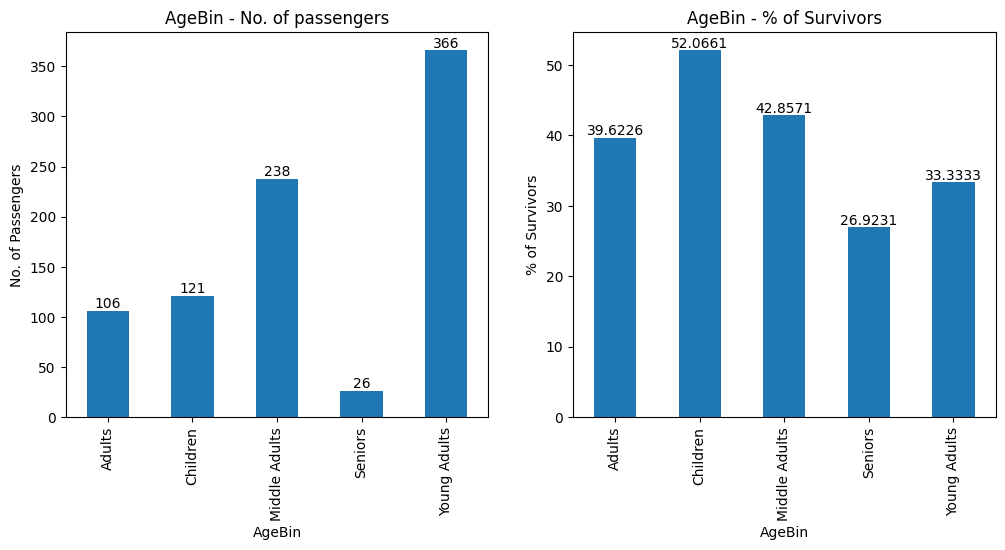

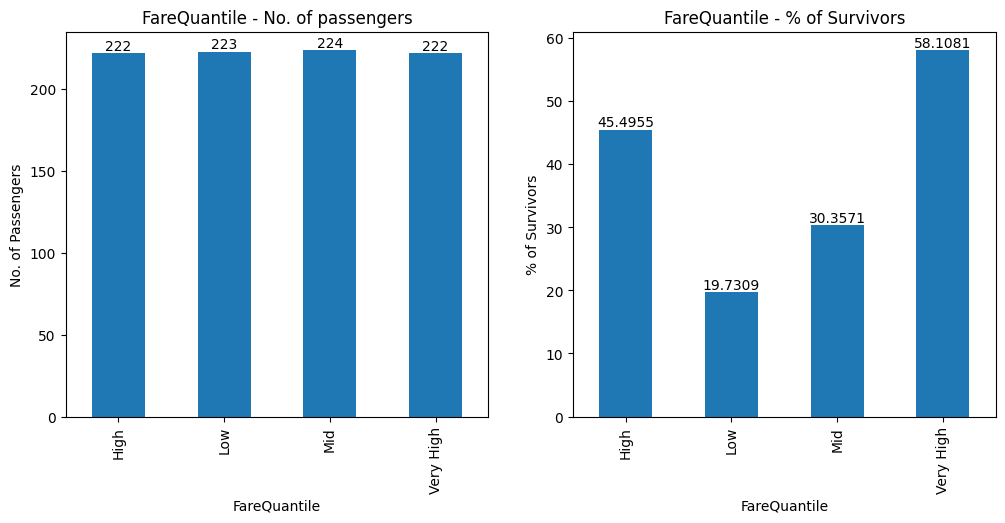

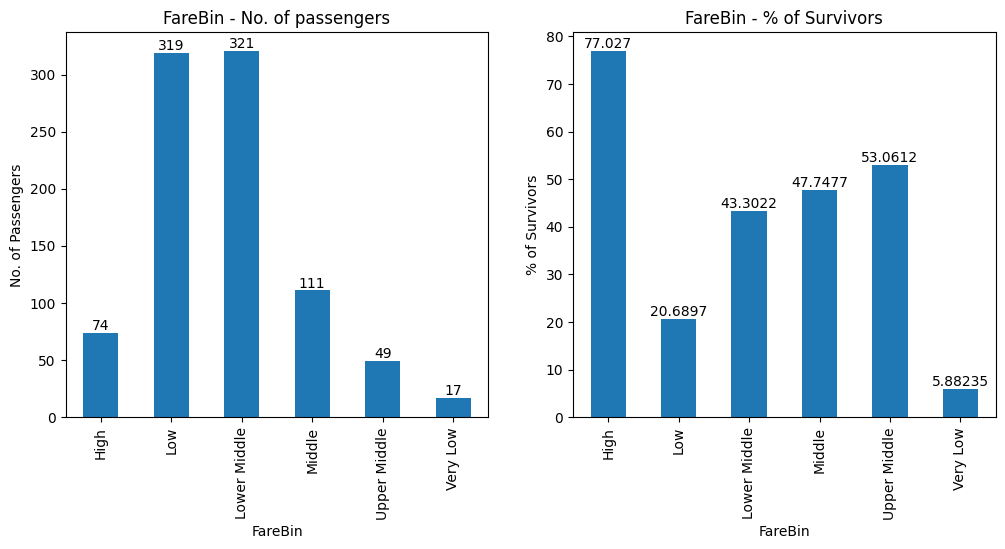

In [21]:
for feature in categorical_feature:
    data=df.copy()
    fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(12,5))
    data.groupby(feature)[feature].count().plot.bar(ax=axes[0])
    axes[0].set_title(f'{feature} - No. of passengers' )
    axes[0].set_ylabel('No. of Passengers')
    (data.groupby(feature)['Survived'].mean()*100).plot.bar(ax=axes[1])
    axes[1].set_title(f'{feature} - % of Survivors' )
    axes[1].set_ylabel(f'% of Survivors')
    for ax in axes:
        ax.set_xlabel(feature)
        for container in ax.containers:
            ax.bar_label(container,label_type='edge')
    plt.show()

### Categorical Features

#### Pclass (Passenger Class)
- **Distribution:** *3rd class had the most passengers (`491`), followed by 1st (`216`) and 2nd (`184`).*
- **Survival Trend:** *1st class passengers had the highest survival rate (`63%`), followed by 2nd class (`47.2%`), and 3rd class had the lowest (`24.2%`).*
- **Observation:** *Passenger class is a very strong determinant of survival, with a clear hierarchy.*

#### Sex
- **Distribution:** *More male passengers (`577`) than female passengers (`314`).*
- **Survival Trend:** *e.g., "Females had a significantly higher survival rate (`74.2%`) compared to males (`18.8%`)."*
- **Observation:** *Gender is one of the most critical factors for survival, strongly favoring females.*

#### Embarked (Port of Embarkation)
- **Distribution:** *Most passengers embarked at S (`644`), followed by C (`168`) and Q (`77`).*
- **Survival Trend:** *Passengers embarking at C (Cherbourg) had the highest survival rate (`55.37%`), followed by Q (Queenstown) (`39%`), and S (Southampton) (`33.6%`).*
- **Observation:** *Embarkation port appears to correlate with survival. This might be linked to the socio-economic status or class distribution of passengers from different ports.*

#### Title (Extracted from Name)
- **Distribution:** *'Mr.' was the most common title (`517`), followed by 'Miss' (`182`), 'Mrs.' (`125`), and 'Master' (`40`). Other titles were rare.*
- **Survival Trend:** *'Mrs.' (`79.2%`) and 'Miss' (`69.7%`) had high survival rates. 'Master' also had a high survival rate (`57.5%`). 'Mr.' had a very low survival rate (`15.6%`)."*
- **Observation:** *Title effectively captures a combination of gender, age (for 'Master'), and marital status, strongly correlating with survival outcomes and reflecting the 'women and children' priority.*


#### Deck (Extracted from Cabin)
- **Distribution:** *Most passengers (`676`) had an 'Unknown' deck (no cabin info). Among known decks, C (`67`) and B (`48`) were more common.*
- **Survival Trend:** *Passengers on Decks B (`75%`), D (`75.75%`), and E (`72.2%`) had the highest survival rates. Passengers with 'Unknown' deck had a low survival rate (`29.28%`).*
- **Observation:** *Having a known deck (implying a cabin) was associated with higher survival. Certain higher decks (B, D, E) showed better survival, likely due to proximity to lifeboats and association with higher passenger classes.*

#### HasCabin (Derived from Cabin)
- **Distribution:** *`215` passengers had cabin information (`HasCabin`=True), `676` did not (`HasCabin`=False).*
- **Survival Trend:** *Passengers with a known cabin (`HasCabin`=True) had a survival rate of `66.9%`, while those without (`HasCabin`=False) had `29.2%`.*
- **Observation:** *Simply knowing if a passenger had a cabin is a strong indicator of survival, likely acting as a proxy for Pclass and Fare.*

#### IsAlone (Derived from FamilySize)
- **Distribution:** *`537` passengers were traveling alone (`IsAlone`=True), `354` were not (`IsAlone`=False).*
- **Survival Trend:** *Passengers who were not alone had a higher survival rate (`50.5%`) compared to those traveling alone (`30.3%`).*
- **Observation:** *Traveling with family offered a survival advantage compared to traveling solo.*

#### AgeBin (Binned Age)
- **Distribution:** *'Young Adults' (`18-30`) were the largest group (`366`), followed by 'Middle Adults' (`30-45`) (`238`),'Children' (`0-18`) (`121`), 'Adults' (`45-60`) (`106`) and 'Seniors' (`60+`) (`26`) .*
- **Survival Trend:** *'Children' had the highest survival rate (`52.066%`). Survival rates were `33.33%` for 'Young Adults', `42.85%` for 'Middle Adults', `39.62%` for 'Adults', and `26.92%` for 'Seniors'.*
- **Observation:** *The 'Children' age bin showed a clear survival advantage. Survival generally decreased with increasing age bins, though 'Middle Adults' fared slightly better than 'Young Adults' in this dataset.*


#### FareQuantile (Binned Fare)
- **Distribution:** *e.g., "Passengers were roughly evenly distributed across the four fare quantiles (`222` each)."*
- **Survival Trend:** *Survival increased with fare quantile: 'Very High' (`58.1%`), 'High' (`45.49%`), 'Mid' (`30.35%`), 'Low' (`19.73%`).*
- **Observation:** *Fare quantiles clearly demonstrate that higher fare expenditure is strongly associated with increased survival probability.*

#### FareBin (Binned Fare - custom bins)
- **Distribution:** *'Low' (`6-10`) (`319`) and 'Lower Middle' (`10-30`) (`321`) fare bins contained the most passengers. 'Very Low' (`0-6`) (`17`) and 'High' (`81-550`) (`74`) bins had fewer.*
- **Survival Trend:** *e.g., "A clear declining trend in survival from 'High' fare (`77%`) down to 'Very Low' fare (`5.88%`). For instance, 'Upper Middle' had `53%`, 'Middle' `47.47%`, 'Lower Middle' `43%`, 'Low' `20.68%`."*
- **Observation:** *Custom fare bins confirm the strong positive relationship between fare paid and survival, showing a graded response across categories.*


In [22]:
df.loc[~df['Title'].isin(['Mr','Mrs'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Title,Deck,HasCabin,FamilySize,IsAlone,FarePerPerson,AgeBin,FareQuantile,FareBin
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,Unknown,0,1,1,7.925000,Young Adults,Mid,Low
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Palsson,Master,Unknown,0,5,0,4.215000,Children,High,Lower Middle
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,Sandstrom,Miss,G,1,3,0,5.566667,Children,High,Lower Middle
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,Bonnell,Miss,C,1,1,1,26.550000,Adults,High,Lower Middle
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S,Vestrom,Miss,Unknown,0,1,1,7.854200,Children,Low,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C,Najib,Miss,Unknown,0,1,1,7.225000,Children,Low,Low
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S,Dahlberg,Miss,Unknown,0,1,1,10.516700,Young Adults,Mid,Lower Middle
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Montvila,Rev,Unknown,0,1,1,13.000000,Young Adults,Mid,Lower Middle
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Graham,Miss,B,1,1,1,30.000000,Young Adults,High,Lower Middle


In [23]:
df['Title_1']=df.loc[df['Title'].isin(['Mr','Mrs','Miss','Master']),'Title']

In [24]:
df['Title_1'].fillna('Others',inplace=True)

C:\Users\TADEPALLI SANJAY\AppData\Local\Temp\ipykernel_320\4247849441.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Title_1'].fillna('Others',inplace=True)


In [25]:
df['Title_1'].value_counts()

Title_1
Mr        517
Miss      182
Mrs       125
Master     40
Others     27
Name: count, dtype: int64

## MultiVariate Analysis

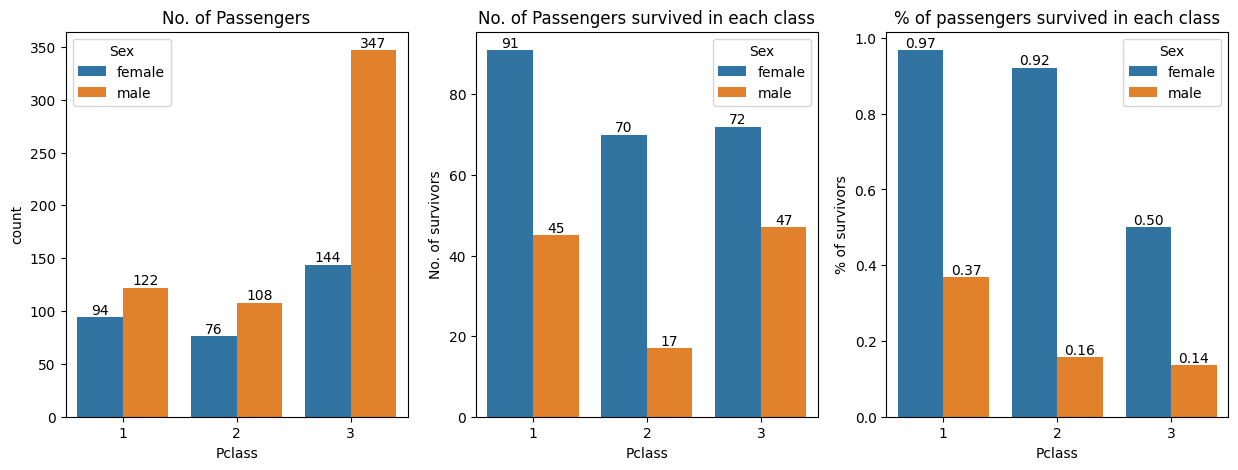

In [56]:
fig,axes=plt.subplots(nrows=1,ncols=3,figsize=(15,5))
sns.countplot(df,x='Pclass',hue='Sex',ax=axes[0])
axes[0].set_title('No. of Passengers')
sns.barplot(df,x='Pclass',y='Survived',estimator='sum',hue='Sex',errorbar=None,ax=axes[1])
axes[1].set_title('No. of Passengers survived in each class')
axes[1].set_ylabel(f'No. of survivors')
sns.barplot(df,x='Pclass',y='Survived',hue='Sex',errorbar=None, estimator='mean',ax=axes[2])
axes[2].set_title(f'% of passengers survived in each class')
axes[2].set_ylabel(f'% of survivors')
for ax in axes:
    for container in ax.containers:
        if ax==axes[0] or ax==axes[1]:
            ax.bar_label(container,label_type='edge')
        elif ax==axes[2]:
            ax.bar_label(container,label_type='edge',fmt='%.2f')